In [1]:
# 2020 and 2019
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Kickstarter_final_ver_2.csv')

In [2]:
df

,Unnamed: 0,backers_count,blurb,country,current_currency,disable_communication,fx_rate,id,is_starrable,name,...,blurb_length,blurb_caps,name_length,name_caps,repeat_creator,overarching_category,page_position,goal_reached,Month,Year
0,6901,2,Lets provide Cape Verde with the same activiti...,NL,USD,0,1.113333,1085396042,0,A brand new fast food & entertainment chain in...,...,121.0,3,58,3,0,food,9,0.0,1,2020
1,10734,67,Mobile Application and Online Community addres...,US,USD,0,1.000000,601978488,0,RIDME,...,88.0,4,5,5,0,fashion,2,0.0,1,2020
2,14508,43,The Rising of the Shield Hero Enamel Pins,US,USD,0,1.000000,131421780,0,Unforeseen Heroes,...,41.0,6,17,2,0,art,1,1.0,1,2020
3,15109,35,"Get your DADSIE on!! Overalls one minute, hand...",AU,USD,0,0.689825,986098168,0,the DADSIE,...,63.0,8,10,6,0,fashion,2,0.0,1,2020
4,23703,276,The Cryptid Collection is an Enamel Pin Series...,US,USD,0,1.000000,794850079,0,Cryptid Collection 2019,...,81.0,8,23,2,0,art,1,1.0,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215653,2020629,55,In 2016 I made a critter a day for the ENTIRE ...,US,USD,0,1.000000,1305740682,0,Help This Calendar Full of Critters Come to Life!,...,131.0,11,49,7,0,publishing,4,1.0,12,2019
215654,2020630,3559,"Atmospheric single-player/co-op RPG set in a ""...",US,USD,0,1.000000,700452989,0,InSomnia - An RPG Set in a Brutal Dieselpunk U...,...,105.0,4,53,10,1,games,7,1.0,12,2019
215655,2020631,44,Seymour Barab is one of America's most inventi...,US,USD,0,1.000000,683017924,0,Recording Barab's Bawd Ballads: a double debut,...,135.0,4,46,4,0,music,3,1.0,12,2019
215656,2020632,17,"PIGBOYS, the photobook series featuring handso...",US,USD,0,1.000000,171527222,0,PIGBOYS: All 3 Books!,...,134.0,7,21,9,0,photography,5,1.0,12,2019


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215658 entries, 0 to 215657
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             215658 non-null  int64  
 1   backers_count          215658 non-null  int64  
 2   blurb                  215658 non-null  object 
 3   country                215658 non-null  object 
 4   current_currency       215658 non-null  object 
 5   disable_communication  215658 non-null  int64  
 6   fx_rate                215658 non-null  float64
 7   id                     215658 non-null  int64  
 8   is_starrable           215658 non-null  int64  
 9   name                   215658 non-null  object 
 10  staff_pick             215658 non-null  int64  
 11  usd_pledged            215657 non-null  float64
 12  usd_goal               215658 non-null  float64
 13  duration_days          215658 non-null  float64
 14  blurb_length           215658 non-nu

In [4]:
#columns that arent useful for ML: 'blurb', 'creator', 'currency', 'deadline', 'id', 'name', 'profile', 'slug'
df.drop(['Unnamed: 0','is_starrable','fx_rate','duration_days','country','current_currency'], 
        axis = 1, inplace = True)

In [5]:
df

,backers_count,blurb,disable_communication,id,name,staff_pick,usd_pledged,usd_goal,blurb_length,blurb_caps,name_length,name_caps,repeat_creator,overarching_category,page_position,goal_reached,Month,Year
0,2,Lets provide Cape Verde with the same activiti...,0,1085396042,A brand new fast food & entertainment chain in...,0,14.405949,16622.248350,121.0,3,58,3,0,food,9,0.0,1,2020
1,67,Mobile Application and Online Community addres...,0,601978488,RIDME,0,5015.000000,100000.000000,88.0,4,5,5,0,fashion,2,0.0,1,2020
2,43,The Rising of the Shield Hero Enamel Pins,0,131421780,Unforeseen Heroes,0,1768.000000,450.000000,41.0,6,17,2,0,art,1,1.0,1,2020
3,35,"Get your DADSIE on!! Overalls one minute, hand...",0,986098168,the DADSIE,0,4222.662018,7668.289310,63.0,8,10,6,0,fashion,2,0.0,1,2020
4,276,The Cryptid Collection is an Enamel Pin Series...,0,794850079,Cryptid Collection 2019,0,7163.000000,1200.000000,81.0,8,23,2,0,art,1,1.0,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215653,55,In 2016 I made a critter a day for the ENTIRE ...,0,1305740682,Help This Calendar Full of Critters Come to Life!,1,1589.000000,1250.000000,131.0,11,49,7,0,publishing,4,1.0,12,2019
215654,3559,"Atmospheric single-player/co-op RPG set in a ""...",0,700452989,InSomnia - An RPG Set in a Brutal Dieselpunk U...,0,92268.290000,70000.000000,105.0,4,53,10,1,games,7,1.0,12,2019
215655,44,Seymour Barab is one of America's most inventi...,0,683017924,Recording Barab's Bawd Ballads: a double debut,0,10090.000000,10000.000000,135.0,4,46,4,0,music,3,1.0,12,2019
215656,17,"PIGBOYS, the photobook series featuring handso...",0,171527222,PIGBOYS: All 3 Books!,0,1997.000000,1850.000000,134.0,7,21,9,0,photography,5,1.0,12,2019


In [6]:
df.loc[df['id'] == 1240927615]

,backers_count,blurb,disable_communication,id,name,staff_pick,usd_pledged,usd_goal,blurb_length,blurb_caps,name_length,name_caps,repeat_creator,overarching_category,page_position,goal_reached,Month,Year
37,0,123MOVIES WATCH JUMANJI: THE NEXT LEVEL 2019 F...,1,1240927615,WATCH JUMANJI: THE NEXT LEVEL 2019 FULL MOVIE ...,0,NaN,0.0,112.0,62,72,46,0,film & video,11,NaN,2,2020


In [7]:
df.dropna(subset = ["goal_reached"], inplace=True)

In [8]:
df.loc[df['id'] == 1240927615]

,backers_count,blurb,disable_communication,id,name,staff_pick,usd_pledged,usd_goal,blurb_length,blurb_caps,name_length,name_caps,repeat_creator,overarching_category,page_position,goal_reached,Month,Year


In [9]:
df.isnull().sum()

backers_count            0
blurb                    0
disable_communication    0
id                       0
name                     0
staff_pick               0
usd_pledged              0
usd_goal                 0
blurb_length             0
blurb_caps               0
name_length              0
name_caps                0
repeat_creator           0
overarching_category     0
page_position            0
goal_reached             0
Month                    0
Year                     0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215657 entries, 0 to 215657
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   backers_count          215657 non-null  int64  
 1   blurb                  215657 non-null  object 
 2   disable_communication  215657 non-null  int64  
 3   id                     215657 non-null  int64  
 4   name                   215657 non-null  object 
 5   staff_pick             215657 non-null  int64  
 6   usd_pledged            215657 non-null  float64
 7   usd_goal               215657 non-null  float64
 8   blurb_length           215657 non-null  float64
 9   blurb_caps             215657 non-null  int64  
 10  name_length            215657 non-null  int64  
 11  name_caps              215657 non-null  int64  
 12  repeat_creator         215657 non-null  int64  
 13  overarching_category   215657 non-null  object 
 14  page_position          215657 non-nu

In [11]:
#columns that arent useful for ML: 'blurb', 'creator', 'currency', 'deadline', 'id', 'name', 'profile', 'slug'
df.drop(['disable_communication','blurb','id','name','Month'], axis = 1, inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215657 entries, 0 to 215657
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   backers_count         215657 non-null  int64  
 1   staff_pick            215657 non-null  int64  
 2   usd_pledged           215657 non-null  float64
 3   usd_goal              215657 non-null  float64
 4   blurb_length          215657 non-null  float64
 5   blurb_caps            215657 non-null  int64  
 6   name_length           215657 non-null  int64  
 7   name_caps             215657 non-null  int64  
 8   repeat_creator        215657 non-null  int64  
 9   overarching_category  215657 non-null  object 
 10  page_position         215657 non-null  int64  
 11  goal_reached          215657 non-null  float64
 12  Year                  215657 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 23.0+ MB


In [13]:
df['usd_pledged'] = df['usd_pledged'].apply(np.int64)
df['usd_goal'] = df['usd_goal'].apply(np.int64)
df['goal_reached'] = df['goal_reached'].apply(np.int64)
df['blurb_length'] = df['blurb_length'].apply(np.int64)

In [14]:
df_2019 = df.loc[df['Year'] == 2019]

In [15]:
df_2019

,backers_count,staff_pick,usd_pledged,usd_goal,blurb_length,blurb_caps,name_length,name_caps,repeat_creator,overarching_category,page_position,goal_reached,Year
25692,3,0,116,347,54,5,45,4,1,art,4,0,2019
25693,84,1,1795,484,133,2,58,5,0,games,9,1,2019
25694,13,1,2017,2000,107,4,31,5,1,publishing,13,1,2019
25695,1,0,1,3684,113,3,9,2,1,technology,2,0,2019
25696,143,0,11031,5000,108,3,30,11,1,comics,2,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215653,55,1,1589,1250,131,11,49,7,0,publishing,4,1,2019
215654,3559,0,92268,70000,105,4,53,10,1,games,7,1,2019
215655,44,0,10090,10000,135,4,46,4,0,music,3,1,2019
215656,17,0,1997,1850,134,7,21,9,0,photography,5,1,2019


In [16]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189966 entries, 25692 to 215657
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   backers_count         189966 non-null  int64 
 1   staff_pick            189966 non-null  int64 
 2   usd_pledged           189966 non-null  int64 
 3   usd_goal              189966 non-null  int64 
 4   blurb_length          189966 non-null  int64 
 5   blurb_caps            189966 non-null  int64 
 6   name_length           189966 non-null  int64 
 7   name_caps             189966 non-null  int64 
 8   repeat_creator        189966 non-null  int64 
 9   overarching_category  189966 non-null  object
 10  page_position         189966 non-null  int64 
 11  goal_reached          189966 non-null  int64 
 12  Year                  189966 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 20.3+ MB


In [17]:
# proportion of successful and failed projects 2019
tv = df_2019['goal_reached'].value_counts()
print(tv)
print(tv[1]/(tv[0]+tv[1]))

1    109301
0     80665
Name: goal_reached, dtype: int64
0.5753713822473495


In [ ]:
# Log and handle outlier
# backers_count
dims = (14, 6)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=dims)
sns.distplot(df_2019.backers_count, ax=ax1)
sns.distplot(np.log1p(df_2019.backers_count), ax=ax2)
ax1.set_title('Central tendency before Log transformation',
             fontsize = 13)
ax2.set_title('Central tendency before after Log transformation', 
             fontsize = 13)

In [ ]:
# Log and handle outlier
# combine different plots into one: goal and log(goal)
dims = (14, 6)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=dims)
sns.distplot(df_2019.usd_pledged, ax=ax1)
sns.distplot(np.log1p(df_2019.usd_pledged), ax=ax2)
ax1.set_title('Central tendency before Log transformation',
             fontsize = 13)
ax2.set_title('Central tendency before after Log transformation', 
             fontsize = 13)

In [ ]:
# Log and handle outlier
# combine different plots into one: goal and log(goal)
dims = (14, 6)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=dims)
sns.distplot(df_2019.usd_goal, ax=ax1)
sns.distplot(np.log1p(df_2019.usd_goal), ax=ax2)
ax1.set_title('Central tendency before Log transformation',
             fontsize = 13)
ax2.set_title('Central tendency before after Log transformation', 
             fontsize = 13)

In [ ]:
# Log and handle outlier
# combine different plots into one: goal and log(goal)
dims = (14, 6)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=dims)
sns.distplot(df_2019.blurb_length, ax=ax1)

In [ ]:
# Log and handle outlier
# combine different plots into one: goal and log(goal)
dims = (14, 6)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=dims)
sns.distplot(df_2019.blurb_caps, ax=ax1)
sns.distplot(np.log1p(df_2019.blurb_caps), ax=ax2)
ax1.set_title('Central tendency before Log transformation',
             fontsize = 13)
ax2.set_title('Central tendency before after Log transformation', 
             fontsize = 13)

In [ ]:
# Log and handle outlier
# combine different plots into one: goal and log(goal)
dims = (14, 6)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=dims)
sns.distplot(df_2019.name_length, ax=ax1)

In [ ]:
# Log and handle outlier
# combine different plots into one: goal and log(goal)
dims = (14, 6)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=dims)
sns.distplot(df_2019.name_caps, ax=ax1)
sns.distplot(np.log1p(df_2019.name_caps), ax=ax2)
ax1.set_title('Central tendency before Log transformation',
             fontsize = 13)
ax2.set_title('Central tendency before after Log transformation', 
             fontsize = 13)

In [ ]:
# Log and handle outlier
# combine different plots into one: goal and log(goal)
dims = (14, 6)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=dims)
sns.distplot(df_2019.page_position, ax=ax1)
sns.distplot(np.log1p(df_2019.page_position), ax=ax2)
ax1.set_title('Central tendency before Log transformation',
             fontsize = 13)
ax2.set_title('Central tendency before after Log transformation', 
             fontsize = 13)

In [18]:
#code to fix skew in key variables
df_2019['backers_count_log'] = np.log1p(df_2019['backers_count'])
df_2019['usd_pledged_log'] = np.log1p(df_2019['usd_pledged'])
df_2019['usd_goal_log'] = np.log1p(df_2019['usd_goal'])
df_2019['name_caps_log'] = np.log1p(df_2019['name_caps'])
df_2019['page_position_log'] = np.log1p(df_2019['page_position'])
df_2019['blurb_caps_log'] = np.log1p(df_2019['blurb_caps'])
# max_blurb = np.max(df['blurb_length'])
# df['blurb_length'] = np.log1p((1+max_blurb)-df['blurb_length'])
# sns.distplot(df['blurb_length'])
print('done')

done


<ipython-input-18-27e928022b41>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['backers_count_log'] = np.log1p(df_2019['backers_count'])
<ipython-input-18-27e928022b41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['usd_pledged_log'] = np.log1p(df_2019['usd_pledged'])
<ipython-input-18-27e928022b41>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [19]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189966 entries, 25692 to 215657
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   backers_count         189966 non-null  int64  
 1   staff_pick            189966 non-null  int64  
 2   usd_pledged           189966 non-null  int64  
 3   usd_goal              189966 non-null  int64  
 4   blurb_length          189966 non-null  int64  
 5   blurb_caps            189966 non-null  int64  
 6   name_length           189966 non-null  int64  
 7   name_caps             189966 non-null  int64  
 8   repeat_creator        189966 non-null  int64  
 9   overarching_category  189966 non-null  object 
 10  page_position         189966 non-null  int64  
 11  goal_reached          189966 non-null  int64  
 12  Year                  189966 non-null  int64  
 13  backers_count_log     189966 non-null  float64
 14  usd_pledged_log       189966 non-null  float64
 

In [20]:
# create dummy variables 
df_2019_dummy = pd.get_dummies(df_2019)

In [21]:
df_2019_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189966 entries, 25692 to 215657
Data columns (total 33 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   backers_count                      189966 non-null  int64  
 1   staff_pick                         189966 non-null  int64  
 2   usd_pledged                        189966 non-null  int64  
 3   usd_goal                           189966 non-null  int64  
 4   blurb_length                       189966 non-null  int64  
 5   blurb_caps                         189966 non-null  int64  
 6   name_length                        189966 non-null  int64  
 7   name_caps                          189966 non-null  int64  
 8   repeat_creator                     189966 non-null  int64  
 9   page_position                      189966 non-null  int64  
 10  goal_reached                       189966 non-null  int64  
 11  Year                               

In [23]:
del df_2019_dummy["backers_count"] 
del df_2019_dummy["usd_pledged"]
del df_2019_dummy["usd_goal"]
del df_2019_dummy["name_caps"]
del df_2019_dummy["page_position"]
del df_2019_dummy["blurb_caps"]
del df_2019_dummy["Year"]

In [ ]:
del df_2019_dummy["backers_count_log"]
del df_2019_dummy["usd_pledged_log"]

In [ ]:
df_2019_dummy.info()

In [ ]:
df_2019['usd_pledged'].describe()

In [ ]:
df_2019['backers_count'].describe()

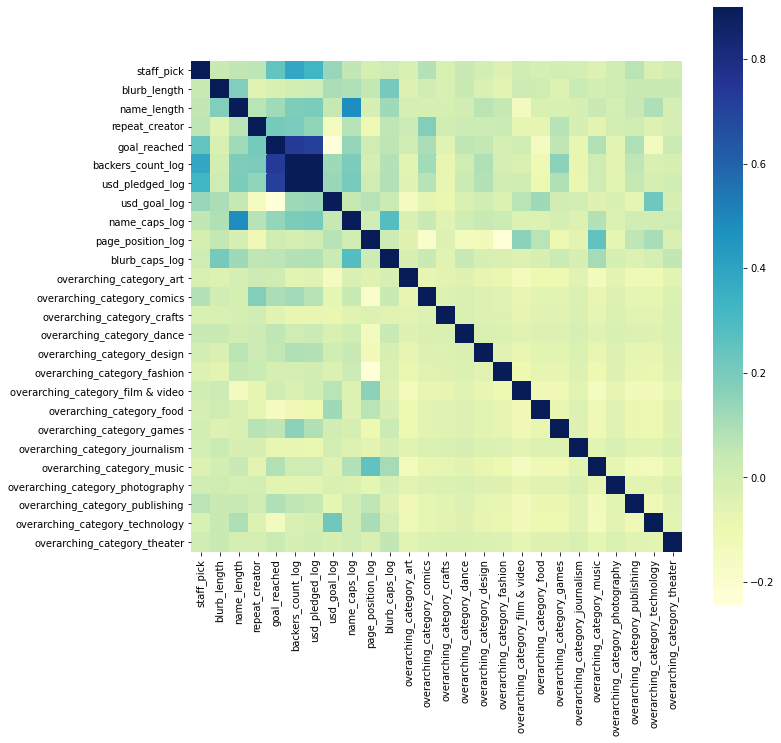

In [24]:
import matplotlib.pyplot as plt
corr = df_2019_dummy.corr()
plt.subplots(figsize=(11,11))
sns.heatmap(corr, vmax=0.9,cmap="YlGnBu", square=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
stratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1)
train_index, test_index = list(stratified_splitter.split(df_2019_dummy, df_2019_dummy["goal_reached"]))[0]
trainset = df_2019_dummy.iloc[train_index]
testset = df_2019_dummy.iloc[test_index]

In [ ]:
trainset.info()

In [ ]:
# drop labels for training set, but keep all others
Xtrain = trainset.drop("goal_reached", axis=1)
ytrain = trainset["goal_reached"].copy()
Xtest = testset.drop("goal_reached", axis=1)
ytest = testset["goal_reached"].copy()

In [ ]:
Xtrain.info()

In [ ]:
ytrain.unique()

In [ ]:
ytest.unique()

In [ ]:
#from sklearn.decomposition import PCA
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler
#from sklearn.neighbors import KNeighborsClassifier
#pipe_knn = Pipeline(steps=[
#    ('scl', StandardScaler()), # scale the matrix
#    ('pca', PCA(n_components=2, random_state=1)), # reduce the dimensionality
#    ('knn', KNeighborsClassifier(n_neighbors=4, p=2, metric='minkowski', n_jobs=-1)) # perform KNN
#])

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
# Random forest

# initialize list of the transformations
pipe_rf = Pipeline(steps=[
    ('std', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=4, min_samples_leaf=3))
])

# list of the parameters to test
param_grid = [
    {
        'rf__max_depth': [3, 4, 5],
        'rf__min_samples_leaf': [4, 5]
    }
]

# initialize grid search
estimator = GridSearchCV(
    pipe_rf,
    cv=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1), # preserve class balance
    param_grid=param_grid,
    scoring='roc_auc'
)

# fit train data
estimator.fit(Xtrain, ytrain)

In [ ]:
print('Best Grid Search result :', estimator.best_score_)
print('Best parameter :', estimator.best_params_)

In [ ]:
# get best classifier
clf_rf = estimator.best_estimator_

# predict test data set
y_pred_rf = estimator.predict(Xtest)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# test data set auc error
print('Train data ROC/AUC :', )
print('Test data ROC/AUC :', roc_auc_score(y_true=ytest, y_score=y_pred_rf))

# confusion matrix
print('\nConfusion matrix')
print(confusion_matrix(y_true=ytest, y_pred=y_pred_rf))

# classification matrix
print('\nClassification matrix')
print(classification_report(y_true=ytest, y_pred=y_pred_rf))

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(estimator.best_estimator_, Xtest, ytest,
                                 display_labels=["no", "yes"],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix of prediction in Kickerstarter success', size = 13)
# How to improve no prediction
# Dung model de predict cho 2021, nhan xet nhan to anh huong, lam the nao cai thien model, application in real
# life ntn, nguoi ma dung Kikcerstarter thi xem du lieu nay thi xem du an nao la du an highest potential 

In [ ]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
# initialize list of the transformations

pipe_lr = Pipeline(steps=[
    ('std', StandardScaler()),
    ('lr', LogisticRegression(penalty='l1', C=0.001, random_state=0))
])

param_grid = [
    {
        'lr__C': [0.001, 0.01, 0.1, 1],
        'lr__penalty': ['l1', 'l2']  # regularizatian parameter
    }
]

estimator = GridSearchCV(
    pipe_lr,
    cv=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1), # preserve class balance
    param_grid=param_grid,
    scoring='roc_auc',
)

# fit training data
estimator.fit(Xtrain, ytrain)

In [ ]:
print('Best Grid Search result :', estimator.best_score_)
print('Best parameter :', estimator.best_params_)

In [ ]:
# get best estimator
clf_lr = estimator.best_estimator_

# predict test data set
y_pred_lr = estimator.predict(Xtest)

In [ ]:
# test data set auc error
print('Train data ROC/AUC :', )
print('Test data ROC/AUC :', roc_auc_score(y_true=ytest, y_score=y_pred_lr))

# confusion matrix
print('\nConfusion matrix')
print(confusion_matrix(y_true=ytest, y_pred=y_pred_lr))

# classification matrix
print('\nClassification matrix')
print(classification_report(y_true=ytest, y_pred=y_pred_lr))

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(estimator.best_estimator_, Xtest, ytest,
                                 display_labels=["no", "yes"],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix of prediction in Kickerstarter success', size = 13)

In [ ]:
# Preston Lam
# Random forest

# initialize list of the transformations
pipe_rf = Pipeline(steps=[
    ('std', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=10, max_depth=20, min_samples_leaf=3))
])

# list of the parameters to test
param_grid = [
    {
        'rf__max_depth': [3, 4, 5],
        'rf__min_samples_leaf': [4, 5]
    }
]

# initialize grid search
estimator = GridSearchCV(
    pipe_rf,
    cv=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1), # preserve class balance
    param_grid=param_grid,
    scoring='roc_auc'
)

# fit train data
estimator.fit(Xtrain, ytrain)

In [ ]:
print('Best Grid Search result :', estimator.best_score_)
print('Best parameter :', estimator.best_params_)

In [ ]:
# the importance of various factors in predicting success or failure of kickerstarter project 
# before and after covid

In [ ]:
# get best estimator
clf_lr = estimator.best_estimator_

# predict test data set
y_pred_lr = estimator.predict(Xtest)

In [ ]:
# test data set auc error
print('Train data ROC/AUC :', )
print('Test data ROC/AUC :', roc_auc_score(y_true=ytest, y_score=y_pred_lr))

# confusion matrix
print('\nConfusion matrix')
print(confusion_matrix(y_true=ytest, y_pred=y_pred_lr))

# classification matrix
print('\nClassification matrix')
print(classification_report(y_true=ytest, y_pred=y_pred_lr))

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(estimator.best_estimator_, Xtest, ytest,
                                 display_labels=["no", "yes"],
                                 cmap=plt.cm.Blues,
                                 normalize='true')

In [ ]:
pip install wheel

In [ ]:
pip install --no-binary :all: lightgbm

In [ ]:
pip install lightgbm --install-option=--nomp

In [ ]:
conda install lightgbm

In [ ]:
import lightgbm as lgb
# initialize list of the transformations

# We will use parameters that were found based on experiments made on local machine

clf_gbm = lgb.LGBMClassifier(
        n_estimators=500,
        num_leaves=25,
        colsample_bytree=.8,
        subsample=.9,
        max_depth=9,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01
)


# fit training data
clf_gbm.fit(Xtrain,
              ytrain,
              eval_metric='auc', 
              verbose=0)

In [ ]:
# predict test data set
y_pred_gbm = clf_gbm.predict(Xtest)

In [ ]:
# test data set auc error
print('Test data ROC/AUC :', roc_auc_score(y_true=ytest, y_score=y_pred_gbm))

# confusion matrix
print('\nConfusion matrix')
print(confusion_matrix(y_true=ytest, y_pred=y_pred_gbm))

# classification matrix
print('\nClassification matrix')
print(classification_report(y_true=ytest, y_pred=y_pred_gbm))

In [ ]:
# feature importance for Light GBM
predictor_columns = Xtrain.columns
feat_import = list(zip(predictor_columns, list(clf_gbm.feature_importances_)))
ns_df = pd.DataFrame(data = feat_import, columns=['Feat_names', 'Importance'])
ns_df_sorted = ns_df.sort_values(['Importance', 'Feat_names'], ascending = [False, True])

ns_df_sorted

In [ ]:
# Checking overfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gbm.score(Xtrain, ytrain)))

print('Test set score: {:.4f}'.format(clf_gbm.score(Xtest, ytest)))

In [ ]:
import matplotlib.pyplot as plt
import shap
shap_values = shap.TreeExplainer(clf_gbm).shap_values(Xtrain)
plt = shap.summary_plot(shap_values, Xtrain, plot_type = 'bar')
plt.title('Gradient Boosted Classifier: Feature Importances')

In [ ]:
shap.summary_plot(shap_values[1], Xtrain, feature_names = Xtrain.columns)

In [ ]:
i=8
shap.force_plot(explainer.expected_value[0], shap_values[0][i], Xtrain.values[i], feature_names = Xtrain.columns)